In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakibuleceruet/drowsiness-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.17G/2.17G [01:14<00:00, 31.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rakibuleceruet/drowsiness-prediction-dataset/versions/1


In [2]:
import os

# List dataset files
print(os.listdir(path))

['0 FaceImages']


In [3]:
import os

folder_path = os.path.join(path, "0 FaceImages")
print(os.listdir(folder_path)[:10])

['Fatigue Subjects', 'Active Subjects']


In [4]:
import os

fatigue_path = os.path.join(path, "0 FaceImages", "Fatigue Subjects")
active_path = os.path.join(path, "0 FaceImages", "Active Subjects")

print("Fatigue sample files:", os.listdir(fatigue_path)[:5])
print("Active sample files:", os.listdir(active_path)[:5])

Fatigue sample files: ['img_j_8555.jpg', 'img_d_11513.jpg', 'img_f_19633.jpg', 'img_g_3510.jpg', 'img_f_15167.jpg']
Active sample files: ['img_k_10650.jpg', 'image_3973 (2).jpg', 'img_j_5974.jpg', 'image_1798 (3).jpg', 'image_1798 (2).jpg']


In [5]:
import tensorflow as tf
import os

img_height, img_width = 128, 128
batch_size = 32

# Update path to point to the directory containing class folders
data_dir = os.path.join(path, "0 FaceImages")

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class names:", class_names)

Found 9120 files belonging to 2 classes.
Using 7296 files for training.
Found 9120 files belonging to 2 classes.
Using 1824 files for validation.
Class names: ['Active Subjects', 'Fatigue Subjects']


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [7]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(class_names)

model = keras.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.7276 - loss: 0.5382 - val_accuracy: 0.8427 - val_loss: 0.3506
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8482 - loss: 0.3489 - val_accuracy: 0.8465 - val_loss: 0.3301
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.8634 - loss: 0.3049 - val_accuracy: 0.8553 - val_loss: 0.3197
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 227s 997ms/step - accuracy: 0.8633 - loss: 0.2988 - val_accuracy: 0.8618 - val_loss: 0.3138
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 221s 969ms/step - accuracy: 0.8825 - loss: 0.2800 - val_accuracy: 0.8668 - val_loss: 0.2956
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 216s 948ms/step - accuracy: 0.8968 - loss: 0.2394 - val_accuracy: 0.8695 - val_loss: 0.2837
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 220s 967ms/step - accuracy: 0.8999 - loss: 0.2336 - val_accuracy: 0.8723 - val_loss: 0.2761
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 257s 945ms/step - accuracy: 0.9126 - loss: 0.

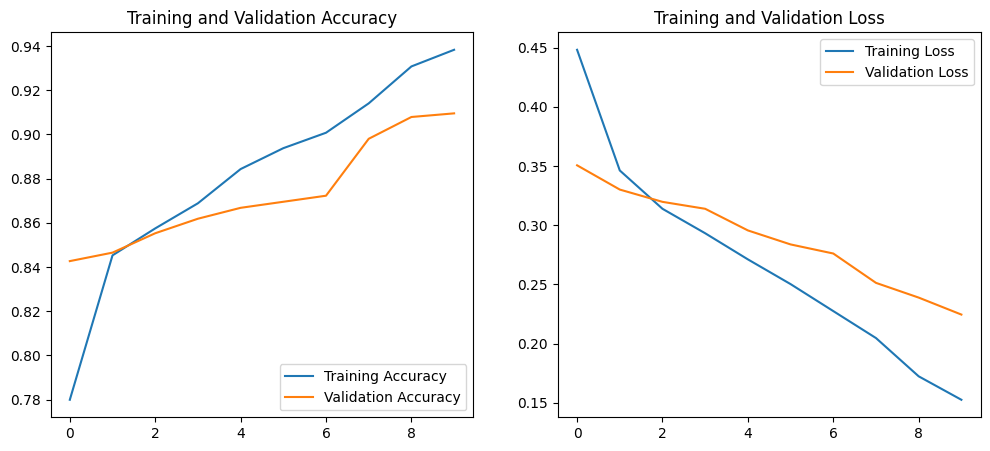

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [10]:
import numpy as np

# Extract images and labels from validation dataset
val_images = []
val_labels = []
for images, labels in val_ds:
    val_images.append(images)
    val_labels.append(labels)

val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# Predict
pred_probs = model.predict(val_images)
pred_labels = np.argmax(pred_probs, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 251ms/step


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc_score = accuracy_score(val_labels, pred_labels)
prec_score = precision_score(val_labels, pred_labels, average='weighted')
rec_score = recall_score(val_labels, pred_labels, average='weighted')
f1 = f1_score(val_labels, pred_labels, average='weighted')

print(f"✅ Accuracy: {acc_score*100:.2f}%")
print(f"✅ Precision: {prec_score*100:.2f}%")
print(f"✅ Recall: {rec_score*100:.2f}%")
print(f"✅ F1-score: {f1*100:.2f}%")

✅ Accuracy: 90.95%
✅ Precision: 91.03%
✅ Recall: 90.95%
✅ F1-score: 90.95%


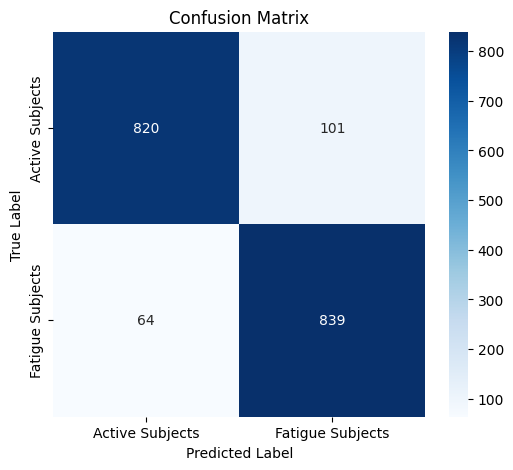

In [14]:
import seaborn as sns
import pandas as pd

cm = confusion_matrix(val_labels, pred_labels)
# class_names = train_ds.class_names # This line caused the error

plt.figure(figsize=(6, 5))
sns.heatmap(pd.DataFrame(cm, index=class_names, columns=class_names),
            annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [15]:
print("Detailed Classification Report:")
print(classification_report(val_labels, pred_labels, target_names=class_names))

Detailed Classification Report:
                  precision    recall  f1-score   support

 Active Subjects       0.93      0.89      0.91       921
Fatigue Subjects       0.89      0.93      0.91       903

        accuracy                           0.91      1824
       macro avg       0.91      0.91      0.91      1824
    weighted avg       0.91      0.91      0.91      1824

